In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, cluster
import plotly.express as px

In [14]:
m_bodies = np.load("aggregated_distances_lgw_sqd500.npy")
names = np.load("image_names.npy")
animals = ['camel', 'cat', 'elephant', 'face', 'flamingo', 'head', 'horse', 'lion']
animals_nd = np.asanyarray(animals)

In [3]:
avg = np.min(m_bodies, axis=0)

In [4]:
m_bodies.shape

(8, 83, 83)

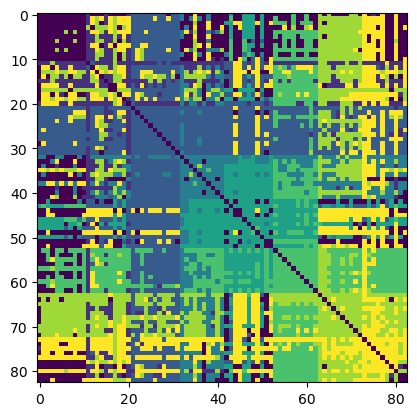

In [5]:
plt.imshow(np.argmin(m_bodies, axis=0))

In [36]:
avg.shape

(83, 83)

In [7]:
mds = manifold.MDS(
    n_components=3,
    max_iter=3000,
    eps=1e-9,
    dissimilarity="precomputed",
    n_jobs=1,
)
pos = mds.fit(avg).embedding_
labels = np.concatenate([np.repeat("red", 11), np.repeat("blue", 10), np.repeat("green", 10)])

/Users/alonsoc1s/miniconda3/envs/tes_smalldata_hackathon/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [18]:
kmeans = cluster.KMeans(n_clusters=8, random_state=0, n_init="auto").fit(pos)
# plt.scatter(pos[:, 0], pos[:, 1], c = kmeans.labels_)
px.scatter_3d(x=pos[:, 0], y=pos[:, 1], z=pos[:, 2], color = kmeans.labels_, hover_name=animals_nd[kmeans.labels_])

In [39]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique,counts))

{0: 5, 1: 16, 2: 10, 3: 10, 4: 12, 5: 13, 6: 6, 7: 11}

In [48]:
names[np.where(kmeans.labels_ == 7)]

array(['elephant01', 'elephant02', 'elephant03', 'elephant04',
       'elephant05', 'elephant06', 'elephant07', 'elephant08',
       'elephant09', 'elephant10', 'elephant11'], dtype='<U10')